In [5]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
# Step 1: Load JSON Data
def load_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)


In [7]:
# Step 2: Analyze Data
def analyze_performance(quiz_submission, historic_data):
    analysis = {}

    # Latest Quiz Stats
    analysis['latest_quiz_accuracy'] = float(quiz_submission['accuracy'].strip('%'))
    analysis['latest_quiz_score'] = quiz_submission['final_score']

    # Historical Trends by Topics
    topics_performance = {}
    for record in historic_data:
        topic = record['quiz']['topic']
        if topic not in topics_performance:
            topics_performance[topic] = {'scores': [], 'accuracy': []}
        
        topics_performance[topic]['scores'].append(record['score'])
        topics_performance[topic]['accuracy'].append(float(record['accuracy'].strip('%')))

    analysis['topics_performance'] = topics_performance
    return analysis

In [8]:
def analyze_performance_by_difficulty(historic_data):
    difficulty_performance = {}

    for record in historic_data:
        difficulty = record['quiz'].get('difficulty_level', 'unknown')
        if difficulty not in difficulty_performance:
            difficulty_performance[difficulty] = {'scores': [], 'accuracy': []}
        
        difficulty_performance[difficulty]['scores'].append(record['score'])
        difficulty_performance[difficulty]['accuracy'].append(float(record['accuracy'].strip('%')))
    
    return difficulty_performance

In [9]:
# Step 3: Generate Insights
def generate_insights(analysis, difficulty_analysis):
    insights = {}

    # Weak Topics
    weak_topics = []
    for topic, data in analysis['topics_performance'].items():
        avg_accuracy = np.mean(data['accuracy'])
        if avg_accuracy < 70:
            weak_topics.append((topic, avg_accuracy))
    insights['weak_topics'] = sorted(weak_topics, key=lambda x: x[1])

    # Weak Difficulty Levels
    weak_difficulties = []
    for difficulty, data in difficulty_analysis.items():
        avg_accuracy = np.mean(data['accuracy'])
        if avg_accuracy < 70:
            weak_difficulties.append((difficulty, avg_accuracy))
    insights['weak_difficulties'] = sorted(weak_difficulties, key=lambda x: x[1])

    return insights

In [10]:
# Step 4: Create Recommendations
def create_recommendations(insights):
    recommendations = []

    # Recommendations for Weak Topics
    for topic, accuracy in insights['weak_topics']:
        recommendations.append(
            f"Focus on {topic} as your average accuracy is {accuracy:.2f}%. "
            f"Review key concepts, solve previous questions, and focus on mastering fundamental concepts."
        )

    # Recommendations for Weak Difficulty Levels
    for difficulty, accuracy in insights['weak_difficulties']:
        recommendations.append(
            f"Improve performance in {difficulty} level questions with an accuracy of {accuracy:.2f}%. "
            f"Practice more medium to hard-level problems and seek guidance for advanced concepts."
        )
    
    return recommendations

In [11]:
# Step 5: Visualization
def plot_performance(analysis):
    topics = []
    scores = []
    accuracies = []
    
    for topic, data in analysis['topics_performance'].items():
        topics.append(topic)
        scores.append(np.mean(data['scores']))
        accuracies.append(np.mean(data['accuracy']))

    fig, ax1 = plt.subplots(figsize=(10, 6))

    sns.barplot(x=topics, y=scores, ax=ax1, color='skyblue', label='Scores')
    ax1.set_ylabel('Average Scores')
    ax1.set_xlabel('Topics')
    ax1.set_xticklabels(topics, rotation=45, ha='right')

    ax2 = ax1.twinx()
    sns.lineplot(x=topics, y=accuracies, ax=ax2, color='red', marker='o', label='Accuracy')
    ax2.set_ylabel('Average Accuracy (%)')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Performance Analysis by Topic')
    plt.tight_layout()
    plt.show()

Insights: {'weak_topics': [('principles of inheritance and variation ', 30.0), ('Human Reproduction', 38.0), ('Reproductive Health', 43.0), ('Respiration and Gas Exchange', 66.0)], 'weak_difficulties': []}

Recommendations:
- Focus on principles of inheritance and variation  as your average accuracy is 30.00%. Review key concepts, solve previous questions, and focus on mastering fundamental concepts.
- Focus on Human Reproduction as your average accuracy is 38.00%. Review key concepts, solve previous questions, and focus on mastering fundamental concepts.
- Focus on Reproductive Health as your average accuracy is 43.00%. Review key concepts, solve previous questions, and focus on mastering fundamental concepts.
- Focus on Respiration and Gas Exchange as your average accuracy is 66.00%. Review key concepts, solve previous questions, and focus on mastering fundamental concepts.


C:\Users\Dell\AppData\Local\Temp\ipykernel_19936\2517595531.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(topics, rotation=45, ha='right')


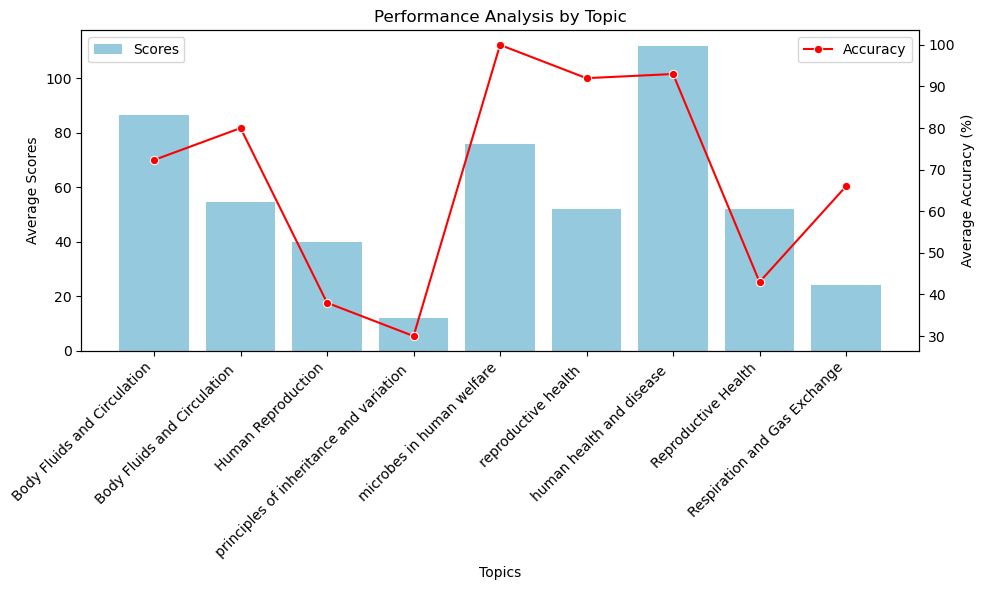

In [15]:
# Main Execution
if __name__ == "__main__":
    # Load data
    quiz_file = r"C:\Users\Dell\Downloads\quiz.json"  # Quiz metadata
    quiz_submission_file = r"C:\Users\Dell\Downloads\quiz_submission.json"  # Latest quiz performance
    historic_file = r"C:\Users\Dell\Downloads\Historic_data.json"  # Historical quiz performance

    quiz_data = load_json(quiz_file)
    quiz_submission = load_json(quiz_submission_file)
    historic_data = load_json(historic_file)

    if quiz_data and quiz_submission and historic_data:
        # Analyze performance
        analysis = analyze_performance(quiz_submission, historic_data)
        difficulty_analysis = analyze_performance_by_difficulty(historic_data)

        # Generate insights
        insights = generate_insights(analysis, difficulty_analysis)
        print("Insights:", insights)

        # Create recommendations
        recommendations = create_recommendations(insights)
        print("\nRecommendations:")
        for rec in recommendations:
            print(f"- {rec}")

        # Visualize performance
        plot_performance(analysis)
    else:
        print("Failed to load data. Please ensure all files are correctly formatted and present.")